In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

In [ ]:
asset_df = pd.read_csv('/content/ASSET_METADATA.csv')

In [ ]:
asset_df.head()

,ASSET_ID,RELEASE_YEAR,MPAA_RATING,GENRE,IMDB_RATING,IMDB_RANKING,IMDB_VOTES,Oscar-Nomination,Oscar-Wins,Other - Nominations,...,TOMATO_METER,TOMATO_RATING,TOMATO_REVIEWS,TOMATO_FRESH,TOMATO_ROTTEN,TOMATO_USER_METER,TOMATO_USER_RATINGS,TOMATO_USER_REVIEWS,TOMATO_IMAGE,BOX_OFFICE_EARNINGS
0,204750,2011.0,R,"Comedy, Thriller",6.2,46.0,"14,995",0,0,0,...,33.0,4.8,55.0,18.0,37.0,36.0,3.0,14994.0,rotten,"$94,700,000"
1,172902,2002.0,R,"Action, Sci-Fi, Sport",2.9,14.0,"21,493",0,0,2,...,3.0,2.6,117.0,4.0,113.0,14.0,2.1,36746.0,rotten,"$18,900,000"
2,198131,2007.0,PG-13,"Adventure, Comedy",2.3,17.0,"84,743",0,0,3,...,2.0,2.3,64.0,1.0,63.0,29.0,2.4,560170.0,rotten,"$39,700,000"
3,195393,2006.0,PG-13,"Comedy, Drama, Romance",6.8,62.0,254029,2,0,37,...,75.0,6.7,187.0,141.0,46.0,76.0,3.6,570016.0,certified,"$124,700,000"
4,185444,2002.0,R,"Horror, Mystery",5.4,28.0,"70,668",0,0,1,...,14.0,3.8,124.0,17.0,107.0,38.0,2.8,376512.0,rotten,"$30,100,000"


## 1. Exploratory Analysis

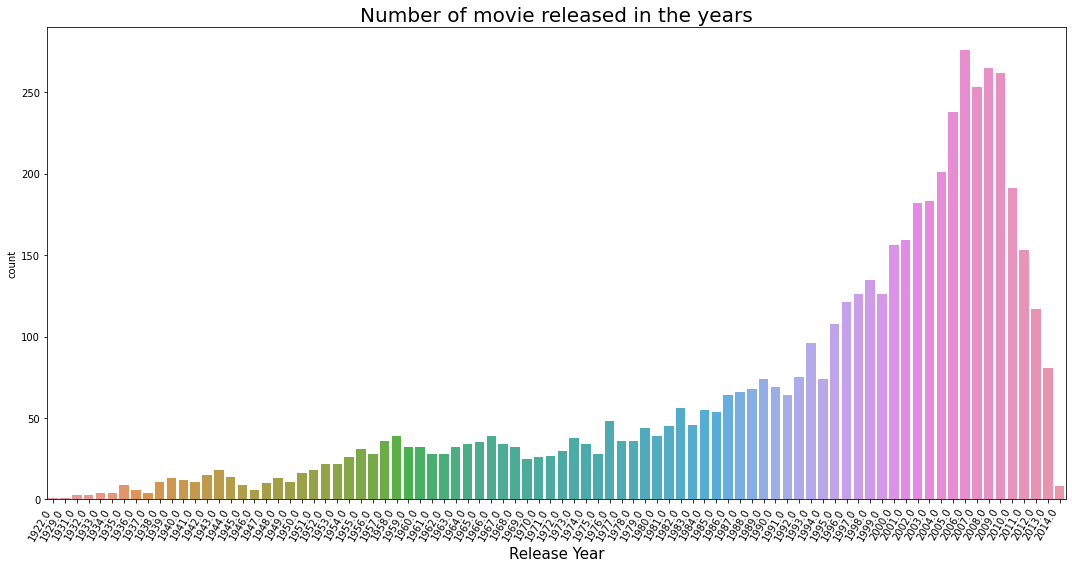

In [ ]:
plt.figure(figsize = (15,8))
p = sns.countplot(data = asset_df, x = 'RELEASE_YEAR')
p.set_xticklabels(p.get_xticklabels(),rotation=60,ha='right')
plt.xlabel('Release Year', fontsize = 15)
plt.title('Number of movie released in the years', fontsize = 20)
plt.tight_layout()
plt.show()

**There is a huge downfall in numbers of movie released after 2010**

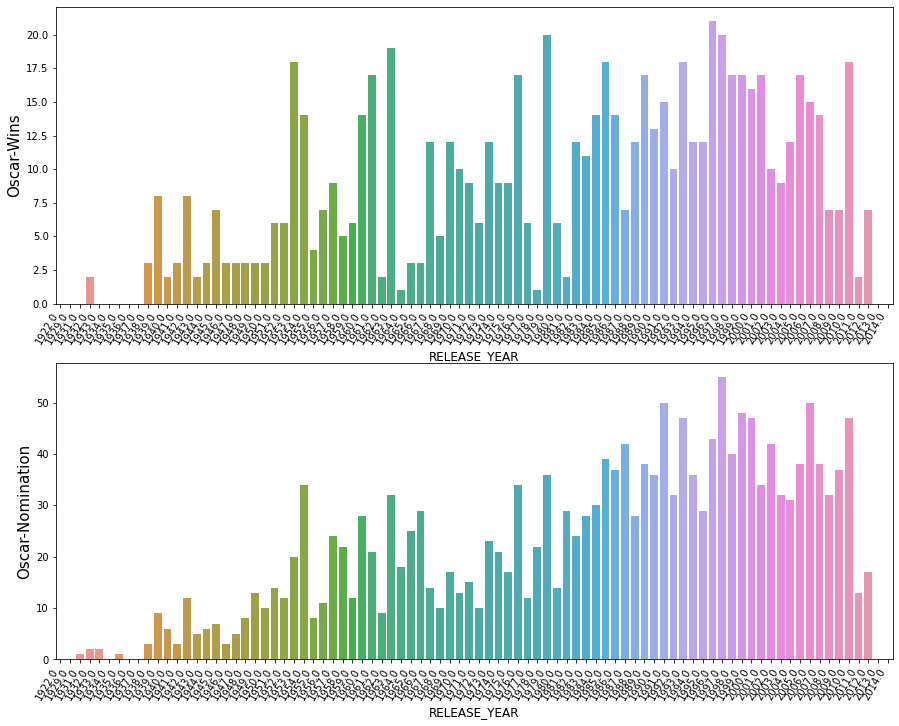

In [ ]:
plt.figure(figsize=(15,12))
plt.subplot(2,1,1)
df = asset_df.groupby('RELEASE_YEAR')['Oscar-Wins'].sum().reset_index()
p=sns.barplot(data = df, x = 'RELEASE_YEAR', y = 'Oscar-Wins', ci = False)
p.set_xticklabels(p.get_xticklabels(),rotation=60,ha='right')
plt.xlabel('RELEASE_YEAR', fontsize = 12)
plt.ylabel('Oscar-Wins', fontsize = 15)
plt.subplot(2,1,2)
df = asset_df.groupby('RELEASE_YEAR')['Oscar-Nomination'].sum().reset_index()
p=sns.barplot(data = df, x = 'RELEASE_YEAR', y = 'Oscar-Nomination', ci = False)
p.set_xticklabels(p.get_xticklabels(),rotation=60,ha='right')
plt.xlabel('RELEASE_YEAR', fontsize = 12)
plt.ylabel('Oscar-Nomination', fontsize = 15)
plt.show()

In [ ]:
asset_df['TOMATO_IMAGE'].iplot(kind='hist')
plt.show()

**Number of rotten movies are slightly greater than fresh movies.**

In [ ]:
def f(x):
    a = ''
    s = ['$',',']
    for i in x:
        if i not in s:
            a += i
    return int(a)
asset_df=asset_df.dropna()
asset_df['BOX_OFFICE_EARNINGS']=asset_df['BOX_OFFICE_EARNINGS'].apply(lambda x: f(x))
df1 = asset_df.groupby('TOMATO_IMAGE')['BOX_OFFICE_EARNINGS'].sum().reset_index()
df1.iplot(kind='bar',x='TOMATO_IMAGE')

**box office earnings of rotten movies-> 24.36B,certified movies ->17.87B and fresh movies->6.34B**

In [ ]:
schedule_df = pd.read_csv('C:/Users/HP/Desktop/ds_basic_reg/Schedule Data.csv')

FileNotFoundError: ignored

In [ ]:
schedule_df.info()

In [ ]:
schedule_df.head()

In [ ]:
df = asset_df.merge(schedule_df,how='inner',on='ASSET_ID')

In [ ]:
df.info()

In [ ]:
columns = list(df.columns)

In [ ]:
print(columns)

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')
plt.tight_layout()
plt.show()

In [ ]:
df1 = df.drop(columns=['ASSET_ID','RELEASE_YEAR','IMDB_VOTES'])

In [ ]:
df1.head()

In [ ]:
df1[["AIRING_END_DATE_TIME", "AIRING_START_DATE_TIME"]] = df1[["AIRING_END_DATE_TIME", "AIRING_START_DATE_TIME"]].apply(pd.to_datetime)
df[["AIRING_END_DATE_TIME", "AIRING_START_DATE_TIME"]] = df[["AIRING_END_DATE_TIME", "AIRING_START_DATE_TIME"]].apply(pd.to_datetime)

In [ ]:
import datetime as dt
df1["AIRING_END_TIME"]=df1["AIRING_END_DATE_TIME"].dt.time
df1["AIRING_START_TIME"]=df1["AIRING_START_DATE_TIME"].dt.time

In [ ]:
df1 = df1.drop(columns=['AIRING_END_DATE_TIME','AIRING_START_DATE_TIME'])

In [ ]:
df1.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder as le
data1=df1.copy()
data1['MPAA_RATING']=le().fit_transform(data1['MPAA_RATING'])
data1['GENRE']=le().fit_transform(data1['GENRE'])
data1['TOMATO_IMAGE']=le().fit_transform(data1['TOMATO_IMAGE'])
data1['DAY_PART']=le().fit_transform(data1['DAY_PART'])
data1['AIRING_END_TIME']=le().fit_transform(data1['AIRING_END_TIME'])
data1['AIRING_START_TIME']=le().fit_transform(data1['AIRING_START_TIME'])

In [ ]:
data1.head()

In [ ]:
data1.info()

In [ ]:
dataset=data1.dropna()

In [ ]:
dataset['TARGET_AIRING_REVENUE']=dataset['AIRING_REVENUE']
df3  = dataset.drop(columns=['AIRING_REVENUE'])
df3.head()

In [ ]:
dataset=df3
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

In [ ]:
y_pred = rfr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

**Trying to predict the AIRING REVENUE WITH DAY_PART AND AIRING_STRT_TIME AND AIRING_END_TIME**

In [ ]:
print(df3.columns)

In [ ]:
df4 = df3.drop(columns=['MPAA_RATING', 'GENRE', 'IMDB_RATING', 'IMDB_RANKING',
       'Oscar-Nomination', 'Oscar-Wins', 'Other - Nominations', 'Other - Wins',
       'TOMATO_METER', 'TOMATO_RATING', 'TOMATO_REVIEWS', 'TOMATO_FRESH',
       'TOMATO_ROTTEN', 'TOMATO_USER_METER', 'TOMATO_USER_RATINGS',
       'TOMATO_USER_REVIEWS', 'TOMATO_IMAGE', 'BOX_OFFICE_EARNINGS',
       'PREMIER_AIRING', 'EXHIBITION_AIRING', 'FREE_AIRING',
       'SCHEDULED_RUNTIME', 'C3_RATING'])

In [ ]:
df4.head()

In [ ]:
dataset=df4
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr2 = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr2.fit(X_train, y_train)

In [ ]:
y_pred = rfr2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.corr(),cbar=True,annot=True,cmap='Blues')
plt.tight_layout()
plt.show()

**3.a)
With regard to the heatmap we can see high correlation bettween 
IMDB_RATING,IMDB_RANKING,....,TOMATO_FRESH,TOMATO_USER_METER, AIRING_END_TIME , AIRING_START_TIME AND TARGET_AIRING_REVENUE is greater than 0.3, It depicts that revenue generated by an asset depends on both factors.**

**3.b)**

